#整数計画問題 / Binary Integer Linear Programming
バイナリ値からなるベクトルxについてSx=bという制約条件を満たす中で、c⋅xが最大となるxを求める。
コスト関数は単純に上記の制約条件と最大にするコスト関数を繋げて、

<img src="./img/004_0.png">



##例題
下記のような例題を用意します。

<img src="./img/004_1.png">


##第1項を計算する
第1項目はSx=bという条件を満たす組み合わせを指定します。
まずはWildqatの準備から入り、指定の式をb^2 - 2*b*A + A^2の形にします。定数は無視して、-2*b*A+A^2をそれぞれ計算して足し合わせます。

In [0]:
!pip install wildqat

In [0]:
import wildqat as wq
import numpy as np
a = wq.opt()

In [6]:
A1 = [3,2,1]
A2 = [5,2,3]

matrix1_1 = -2*3*np.diag(A1) + wq.sqr(A1)
print(matrix1_1)

matrix1_2 = -2*5*np.diag(A2) + wq.sqr(A2)
print(matrix1_2)

[[-9 12  6]
 [ 0 -8  4]
 [ 0  0 -5]]
[[-25  20  30]
 [  0 -16  12]
 [  0   0 -21]]


In [7]:
matrix1 = matrix1_1 + matrix1_2
print(matrix1)

[[-34  32  36]
 [  0 -24  16]
 [  0   0 -26]]


ここで一旦確認をしてみます。上記の条件を満たすのは、

In [11]:
a.qubo = matrix1
a.sa()

1.5210204124450684


[0, 1, 1]

In [12]:
a.sa()

1.515028715133667


[1, 0, 0]

上記のように[0,1,1]や[1,0,0]がでてきました。

##次に第2項を計算する
その次にもう１つのコスト関数を計算します。こちらは、

In [15]:
matrix2 = np.diag([1,2,1])
print(matrix2)

[[1 0 0]
 [0 2 0]
 [0 0 1]]


#QUBOをつなげて計算する
これらをつなげて計算してみます。

In [24]:
B = 1
a.qubo = matrix1 - B * matrix2
a.sa()

1.494323968887329


[0, 1, 1]

答えは、[0,1,1]となりました。
念のためコスト関数の推移も見てみます。

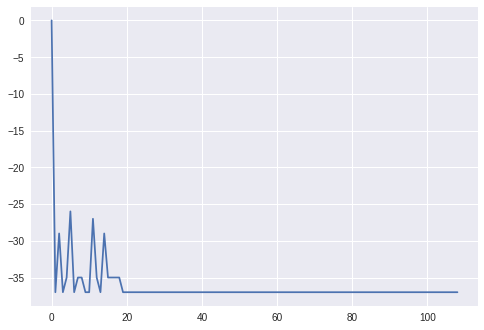

In [26]:
a.plot()